In [1]:
# Load libraries for Questions 3-6

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

from eofs.xarray import Eof
from eofs.examples import example_data_path

In [ ]:
############# QUESTION 3 Materials ##################

# Perform an EOF analysis (with cosine latitude weighting) on the SST anomalies and plot a map of 
# the first 5 EOFs


In [2]:
# open standardized SST dataset
sst = xr.open_dataset('sst_standardized_dataset_v2.nc') 

# drop the month variable
sst = sst.drop_vars("month")

# convert form xr.datset to xr.dataarray
sst = sst.to_array()

# collapse variable dimension 
sst = sst.mean('variable')

# transpose so time is first dimension
sst.transpose("time", "latitude", "longitude")



<xarray.DataArray (time: 516, latitude: 521, longitude: 721)>
array([[[            nan,             nan,             nan, ...,
          2.61783037e-01,  2.54933408e-01,  2.50503174e-01],
        [            nan,             nan,             nan, ...,
          2.16320782e-01,  1.98198669e-01,  1.84533447e-01],
        [            nan,             nan,             nan, ...,
          2.19860597e-01,  2.05734984e-01,  1.91334187e-01],
        ...,
        [-6.73731523e-01, -6.59965057e-01, -6.40958144e-01, ...,
                     nan,             nan,             nan],
        [-1.94765374e+00, -1.91785094e+00, -1.86927979e+00, ...,
                     nan,             nan,             nan],
        [-1.70041619e+00, -1.67961666e+00, -1.65540461e+00, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          2.50146216e-01,  2.47538954e-01,  2.44157009e-01],
        [            nan,             nan,             nan, ...,
          1.95543198e-01,  1.70047763e-01,  1.44396093e-01],
        [            nan,             nan,             nan, ...,
          1.51329531e-01,  1.13597265e-01,  9.72391259e-02],
...
        [-4.44184580e-01, -4.95978022e-01, -5.40488641e-01, ...,
                     nan,             nan,             nan],
        [-3.16854285e-01, -3.39355929e-01, -3.60027477e-01, ...,
                     nan,             nan,             nan],
        [-1.74272773e-01, -2.23872940e-01, -2.35613889e-01, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
          5.33649898e-01,  1.49821567e-02, -2.64929461e-01],
        [            nan,             nan,             nan, ...,
          1.14540980e-01, -1.13112639e-01, -2.52832038e-01],
        [            nan,             nan,             nan, ...,
         -1.15476076e-03, -1.46824666e-01, -2.38327408e-01],
        ...,
        [-3.55668391e-01, -3.02982785e-01, -2.50793270e-01, ...,
                     nan,             nan,             nan],
        [-9.55498217e-01, -9.12293308e-01, -8.66716479e-01, ...,
                     nan,             nan,             nan],
        [-9.49980188e-01, -8.98916504e-01, -9.04513194e-01, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * latitude   (latitude) float64 65.0 64.75 64.5 64.25 ... -64.5 -64.75 -65.0
  * longitude  (longitude) float64 120.0 120.2 120.5 120.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01

In [3]:
# provide weighting based on location of latitude gridpoints
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]

# take weighted EOF of all standardized SST values across lat/lon range
solver = Eof(sst, weights=wgts)

# take eofs represented as a correlation for first 5 EOFs
eof1 = solver.eofsAsCorrelation(neofs=5)

# find first 5 principle components from EOF analysis
pc1 = solver.pcs(npcs=5, pcscaling=1)

/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part g

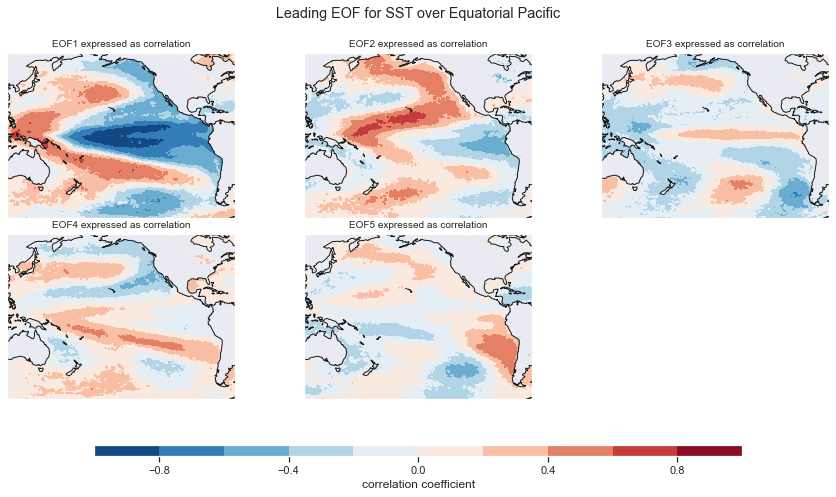

In [7]:
# Mapping first 5 EOFs

EOF_modes=list(['EOF1', 'EOF2', 'EOF3', 'EOF4','EOF5'])

# created 2x3 panel for maps
nrows=2
ncols=3

fig, ax = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=190)},
                        figsize=(15,8))
ax = ax.flatten()
for i,mode in enumerate(EOF_modes):

    clevs = np.linspace(-1, 1, 11)
    fill = ax[i].contourf(eof1['longitude'], eof1['latitude'], eof1[i],cmap=plt.cm.RdBu_r,
                             add_colorbar=False, levels = clevs, transform=ccrs.PlateCarree())
    ax[i].add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
    ax[i].set_title(f'{mode} expressed as correlation', fontsize=10)

# Delete 6th figure component since only 5 components being shown
fig.delaxes(ax[5])

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.1, hspace=0.1)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(fill, cax=cbar_ax,orientation='horizontal')

# Add a big title at the top
plt.suptitle('Leading EOFs for SST over Equatorial Pacific')
cbar.set_label('correlation coefficient', fontsize=12)

In [ ]:
############# QUESTION 4 Materials ##################

# Plot the percent of variance explained by the first 10 EOFs.


(6.704937827260372e-33, 0.19762838351735065)

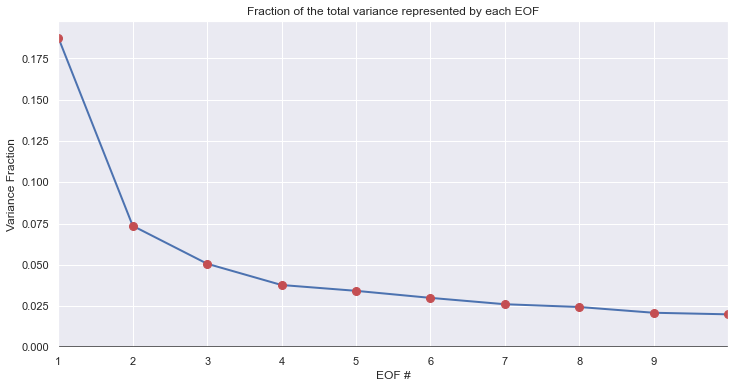

In [6]:
# Use varianceFranction funciton to calculate the franction variance explained
# by each EOF
varfrac = solver.varianceFraction()

# Plot the fraction of variance explained by each EOF
eof_last = 11 
plt.figure(figsize=(12,6))

eof_num = range(1, eof_last) # first 10 EOFs
plt.plot(eof_num, varfrac[0:eof_last-1], linewidth=2)
plt.plot(eof_num, varfrac[0:eof_last-1], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, eof_last-1))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, eof_last-1)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)

In [ ]:
############# QUESTION 5 Materials ##################

# Reconstruct the SST field using the first 5 EOFs and plot a map of the Pearson's correlation 
# coefficient (xarray.corr) of the reconstructed monthly time series and the 
# "observed" SST time series.

In [ ]:
# Load standarized SST observations

sst_orig = xr.open_dataset('sst_standardized_dataset_v2.nc') 
sst = sst.drop_vars("month")
sst = sst.to_array()
sst = sst.mean('variable')

In [8]:
# reconstruct the SST datafield using the first 5 EOFs
reconstruction = solver.reconstructedField(5)

In [9]:
# correlate the restructed SST dataset with the observed SST data values

corr_dataset = xr.corr(reconstruction, sst, dim = 'time')

/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/var/folders/7z/zvdlnbkj3073y5v9tyz6f6b8000

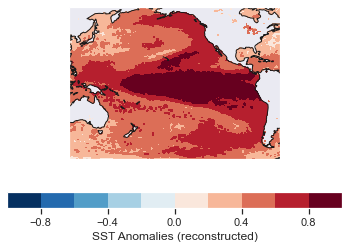

In [16]:
# Map the correlation coefficients between observed SST and restructed SST using first 5 EOFs
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = corr_dataset.plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('SST Anomalies (reconstructed)', fontsize=12)

In [ ]:
############# QUESTION 6 Materials ##################

# Compute a map of the Pearson's correlation coefficient between SST EOF1 and monthly mean detrended, 
# deseasonalized, and standardized monthly mean precipitation anomalies (don't mask these over land 
# for the plot). See anything interesting 

In [11]:
# reconstruct the SST datafield using the first EOF
reconstruction_eof1 = solver.reconstructedField(1)

In [12]:
# Load standarized Precip values
precip = xr.open_dataset('precip_standardized_dataset.nc') 

precip

<xarray.Dataset>
Dimensions:                        (latitude: 521, longitude: 721, time: 516)
Coordinates:
  * latitude                       (latitude) float64 65.0 64.75 ... -65.0
  * longitude                      (longitude) float64 120.0 120.2 ... 300.0
  * time                           (time) datetime64[ns] 1979-01-01 ... 2021-...
    month                          (time) int64 ...
Data variables:
    __xarray_dataarray_variable__  (time, latitude, longitude) float64 ...

In [13]:
# Clean precip so it is formatte properly
precip = precip.drop_vars("month")
precip = precip.to_array()
precip = precip.mean('variable')

precip.transpose("time", "latitude", "longitude")

<xarray.DataArray (time: 516, latitude: 521, longitude: 721)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * latitude   (latitude) float64 65.0 64.75 64.5 64.25 ... -64.5 -64.75 -65.0
  * longitude  (longitude) float64 120.0 120.2 120.5 120.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01

In [14]:
# correlate the restructed SST dataset with the observed SST data values

corr_dataset_precip = xr.corr(reconstruction_eof1, precip, dim = 'time')

/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/var/folders/7z/zvdlnbkj3073y5v9tyz6f6b80000gn/T/ipykernel_77423/3542553259.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(fill, orientation='horizontal')
/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Use

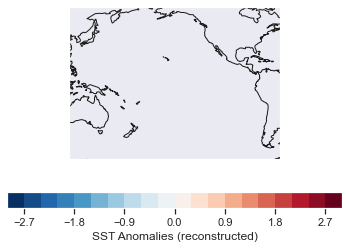

In [15]:
# Map the correlation coefficients between standarized Precip values and restructed SST using first EOF
clevs = np.linspace(-3, 3, 21)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = corr_dataset_precip.plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('SST Anomalies (reconstructed)', fontsize=12)

In [ ]:
# Since the RDA serve is down, I was unable to download precip data correctly. As a result, there is
# no visuals to represent the SST EOF(1) and precipitation. I imagine that an ENSO-like
# precip pattern would be visable across the equatorial Pacific related to La Nina conditions (based
# on the first EOF mapped in problem #3)